<a href="https://colab.research.google.com/github/KZ1101/Rushian/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# url (https://qiita.com/hide-tono/items/41245a198d6febd802ec)

import numpy as np

class Perceptron(object):
    """
    eta: 学習率(0.0<eta<1.0)
    n_iter: トレーニング回数
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """
        X: トレーニングデータ（pandas, 行にサンプル、列に特徴量）
        Y: 目的変数（pandas）
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for ite in range(self.n_iter):
            #print('w:', self.w_)
            errors = 0
            for xi, target in zip(X, y):
                #print('xi:', xi)
                #重みw1,...,wmの更新
                predict = self.predict(xi)
                update = self.eta * (target - predict)
                #print('target:', target, ' predict:', predict, ' update:', update)
                self.w_[1:] += update * xi
                # 重みw0の更新
                self.w_[0] += update
                # 重みの更新が0でない場合は誤分類としてカウント
                error = int(update != 0.0)
                #print('error:', error)
                errors += error
            # 反復回数ごとの誤差を格納
            print(ite, ': ', errors)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """総入力を計算"""
        result = np.dot(X, self.w_[1:]) + self.w_[0]
        #print('w_', self.w_)
        #print('net_input_result:', result)
        return result

    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12460 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38263 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33457 missing from current font.
  font.set_

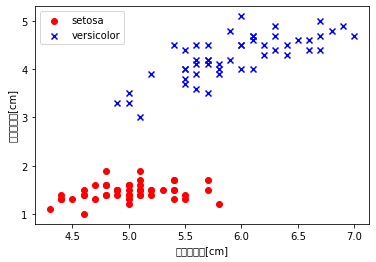

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# irisデータを読み込み
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
print(df.tail())

# 100行目までを抽出
y = df.iloc[0:100, 4].values
# 正解ラベルの変換
y = np.where(y == 'Iris-setosa', -1,1)
# 1行目と3行目を抽出する。
X = df.iloc[0:100, [0, 2]].values
# プロット
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
plt.xlabel('ガクの長さ[cm]')
plt.ylabel('花弁の長さ[cm]')
plt.legend(loc='upper left')
plt.show()

0 :  2
1 :  2
2 :  3
3 :  2
4 :  1
5 :  0
6 :  0
7 :  0
8 :  0
9 :  0


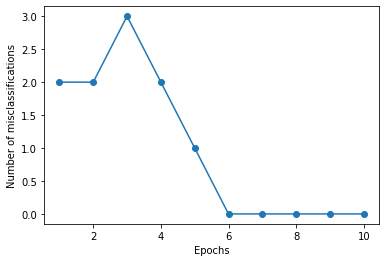

In [3]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


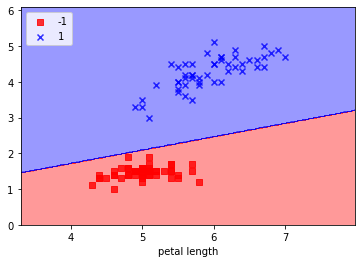

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^','v')
    colors = ('red', 'blue', 'lightgreen', 'grey', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #決定領域のプロット
    #X[:, 0]とやるとPandasのdataframeから各要素の0番目を取得できる
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    #予測実行
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    #予測結果を元のグリッドポイントのデータサイズに変換
    Z = z.reshape(xx1.shape)
    #グリッドポイントの等高線のプロット
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    #軸の範囲の指定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[[y==cl, 1]], alpha=0.8, c=cmap(idx), marker=markers[idx],label=cl)

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length')
plt.xlabel('petal length')
plt.legend(loc='upper left')
plt.show()